In [53]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

* This notebook contains the complete code to merge the all data sets used in this application.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Plotting the data of sentiment analysis and the stock market prices

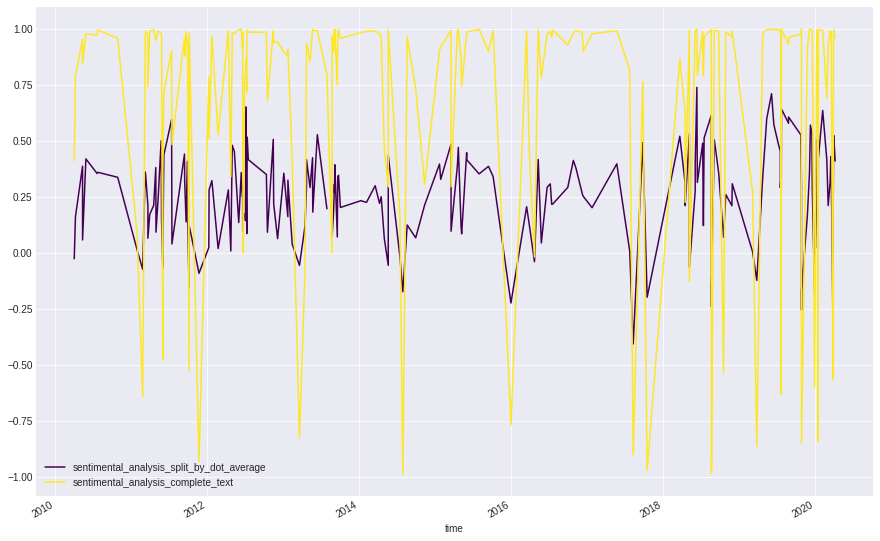

In [55]:
df_text = pd.read_pickle("data sets/microsoft_processed_text_with_time_and_sentiments.pkl")
#df_text.head()
plt.style.use('seaborn-dark')
df_text[["sentimental_analysis_split_by_dot_average","sentimental_analysis_complete_text"]].plot(cmap = "viridis",
                                                                                                 linestyle='-',figsize = (15,10))
plt.grid()
plt.show()

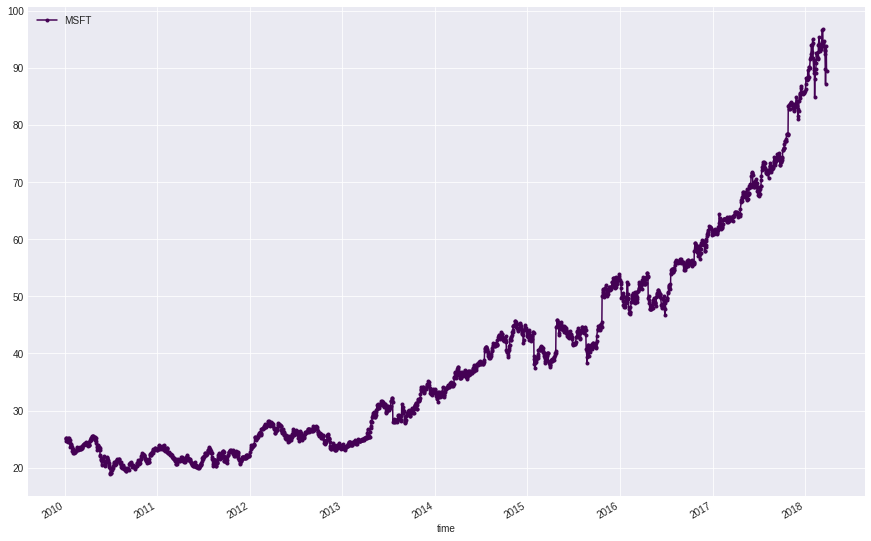

In [56]:
df_values = pd.read_pickle("data sets/df_dow_jones.pkl")
#df_values.head()


microsoft_df = df_values[["MSFT"]]
microsoft_df.plot(cmap = "viridis",linestyle='-',figsize = (15,10),marker='.')
plt.grid()
plt.show()

## 2. Routine to merge the data sets

In [57]:
X = df_text["sentimental_analysis_split_by_dot_average"].copy()
X = X.reset_index(drop= False)
X["time"] = pd.to_datetime(X["time"],errors = 'coerce', format = '%Y-%m-%dT%H:%M',infer_datetime_format = True, cache = True,utc=True)
X["time"] = pd.to_datetime(X["time"])

X = X.set_index(pd.DatetimeIndex(X["time"]))
X.set_index("time")
X.shape

(200, 2)

In [58]:
df_text_gensim = pd.read_pickle("data sets/microsoft_processed_text_with_time_and_gensim.pkl")
#df_text_gensim.head()
names     = df_text_gensim.columns
df_gensim = df_text_gensim[names[5:]].copy()

df_gensim = df_gensim.set_index(X.index)

X = pd.concat([X,df_gensim],axis= 1)

In [59]:
X = X.drop(["time"],axis= 1)

In [60]:
X = X.resample('1d').first()
X = X.tz_convert(None)


In [61]:
y = microsoft_df.copy()
y.shape

(2071, 1)

In [62]:
result = pd.concat([X,y], axis=1,join='inner')
result.shape


(2010, 8098)

In [63]:
result = result.fillna(method='ffill', inplace=False)



In [66]:
result.shape

(2010, 8098)

In [67]:
result.head()

,sentimental_analysis_split_by_dot_average,10,a,additional,agency,agreements,also,amsterdam,and,as,...,possess,pride,productive,productiveedge,signifies,specialized,successes,values,wyatt,MSFT
time,,,,,,,,,,,,,,,,,,,,,
2010-04-01,-0.02620,1.0,3.0,1.0,2.0,1.0,1.0,1.0,7.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.807387
2010-04-05,-0.02620,1.0,3.0,1.0,2.0,1.0,1.0,1.0,7.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.897195
2010-04-06,-0.02620,1.0,3.0,1.0,2.0,1.0,1.0,1.0,7.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.938017
2010-04-07,0.16114,1.0,8.0,0.0,0.0,0.0,4.0,0.0,18.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.962510
2010-04-08,0.16114,1.0,8.0,0.0,0.0,0.0,4.0,0.0,18.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.427881


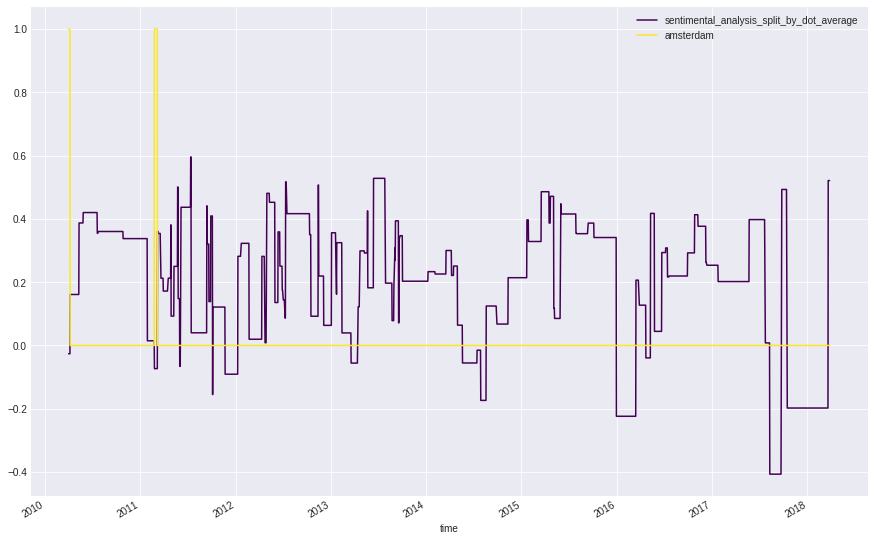

In [72]:
result[["sentimental_analysis_split_by_dot_average","amsterdam"]].plot(cmap = "viridis",linestyle='-',figsize = (15,10))
plt.grid()
plt.show()

In [73]:
result.to_pickle("data sets/data_to_paper_microsoft_case.pkl")